Nilai Keanggotaan Kinerja:
Rendah: 0
Sedang: 0
Tinggi: 0.4


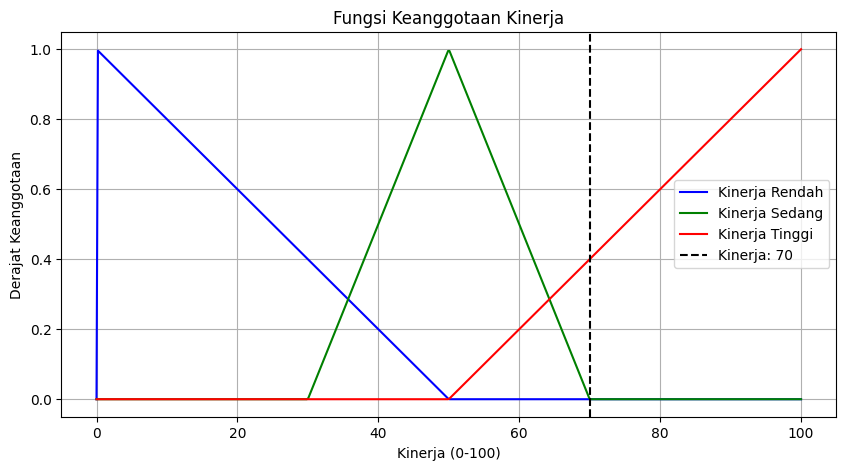

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung nilai keanggotaan (membership) dari himpunan fuzzy
def triangular_membership(x, a, b, c):
    if x <= a:
        return 0
    elif a < x <= b:
        return (x - a) / (b - a)
    elif b < x < c:
        return (c - x) / (c - b)
    else:
        return 0

# Input kinerja dan masa kerja karyawan
kinerja = 70
masa_kerja = 6


# Keanggotaan untuk Kinerja
mu_kinerja_rendah = triangular_membership(kinerja, 0, 0, 50)
mu_kinerja_sedang = triangular_membership(kinerja, 30, 50, 70)
mu_kinerja_tinggi = triangular_membership(kinerja, 50, 100, 100)

# Menampilkan hasil keanggotaan
print("Nilai Keanggotaan Kinerja:")
print(f"Rendah: {mu_kinerja_rendah}")
print(f"Sedang: {mu_kinerja_sedang}")
print(f"Tinggi: {mu_kinerja_tinggi}")

# Visualisasi
# Fungsi untuk plot fungsi keanggotaan segitiga
def plot_triangular_membership(a, b, c, label, color, x_range=(0, 100)):
    x = np.linspace(x_range[0], x_range[1], 500)
    y = [triangular_membership(val, a, b, c) for val in x]
    plt.plot(x, y, label=label, color=color)

# Plot fungsi keanggotaan untuk Kinerja
plt.figure(figsize=(10, 5))
plot_triangular_membership(0, 0, 50, 'Kinerja Rendah', 'blue')
plot_triangular_membership(30, 50, 70, 'Kinerja Sedang', 'green')
plot_triangular_membership(50, 100, 100, 'Kinerja Tinggi', 'red')
plt.axvline(x=kinerja, color='black', linestyle='--', label=f'Kinerja: {kinerja}')
plt.title("Fungsi Keanggotaan Kinerja")
plt.xlabel("Kinerja (0-100)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid(True)
plt.show()


Nilai Keanggotaan Masa Kerja:
Pendek: 0
Sedang: 0.6666666666666666
Panjang: 0.2


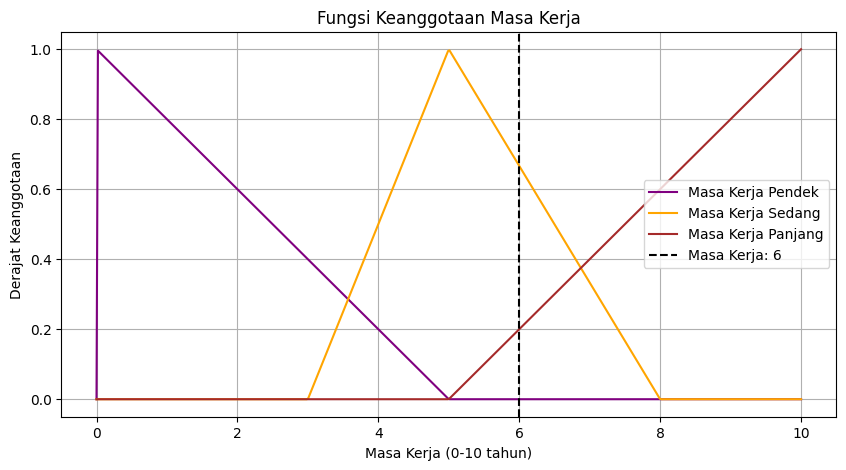

In [13]:
# Keanggotaan untuk Masa Kerja
mu_masa_kerja_pendek = triangular_membership(masa_kerja, 0, 0, 5)
mu_masa_kerja_sedang = triangular_membership(masa_kerja, 3, 5, 8)
mu_masa_kerja_panjang = triangular_membership(masa_kerja, 5, 10, 10)

print("\nNilai Keanggotaan Masa Kerja:")
print(f"Pendek: {mu_masa_kerja_pendek}")
print(f"Sedang: {mu_masa_kerja_sedang}")
print(f"Panjang: {mu_masa_kerja_panjang}")

# Plot fungsi keanggotaan untuk Masa Kerja (dengan range 0-10)
plt.figure(figsize=(10, 5))
plot_triangular_membership(0, 0, 5, 'Masa Kerja Pendek', 'purple', x_range=(0, 10))
plot_triangular_membership(3, 5, 8, 'Masa Kerja Sedang', 'orange', x_range=(0, 10))
plot_triangular_membership(5, 10, 10, 'Masa Kerja Panjang', 'brown', x_range=(0, 10))
plt.axvline(x=masa_kerja, color='black', linestyle='--', label=f'Masa Kerja: {masa_kerja}')
plt.title("Fungsi Keanggotaan Masa Kerja")
plt.xlabel("Masa Kerja (0-10 tahun)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid(True)
plt.show()


Nilai Keanggotaan Bonus:
Kecil: 0
Sedang: 0.4
Besar: 0.2

Nilai Bonus Akhir: 61.67


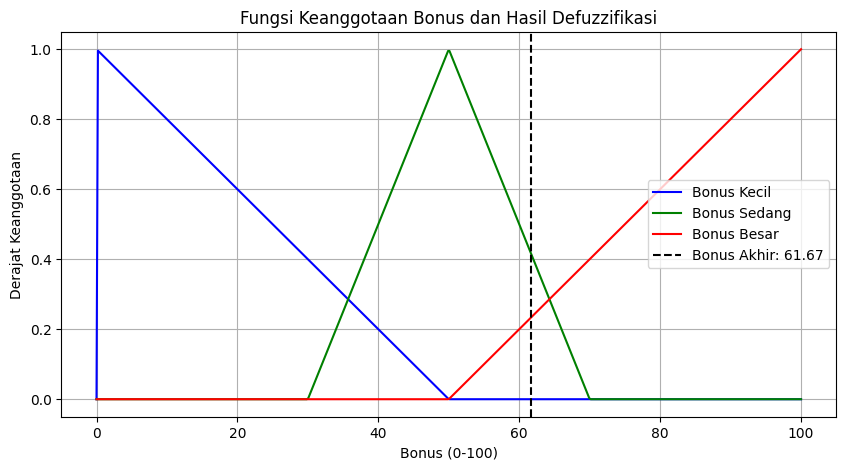

In [14]:
# Defuzzifikasi menggunakan metode Centroid
center_kecil = 15
center_sedang = 50
center_besar = 85


# Menentukan derajat keanggotaan untuk bonus berdasarkan aturan fuzzy
bonus_besar = min(mu_kinerja_tinggi, mu_masa_kerja_panjang)
bonus_sedang = min(mu_kinerja_tinggi, mu_masa_kerja_sedang)
bonus_kecil = min(mu_kinerja_rendah, mu_masa_kerja_pendek)

print("\nNilai Keanggotaan Bonus:")
print(f"Kecil: {bonus_kecil}")
print(f"Sedang: {bonus_sedang}")
print(f"Besar: {bonus_besar}")

numerator = (bonus_kecil * center_kecil) + (bonus_sedang * center_sedang) + (bonus_besar * center_besar)
denominator = bonus_kecil + bonus_sedang + bonus_besar

if denominator != 0:
    bonus_akhir = numerator / denominator
else:
    bonus_akhir = 0
    
print(f"\nNilai Bonus Akhir: {bonus_akhir:.2f}")

# Plot fungsi keanggotaan untuk Hasil Defuzzifikasi Bonus
plt.figure(figsize=(10, 5))
plot_triangular_membership(0, 0, 50, 'Bonus Kecil', 'blue')
plot_triangular_membership(30, 50, 70, 'Bonus Sedang', 'green')
plot_triangular_membership(50, 100, 100, 'Bonus Besar', 'red')
plt.axvline(x=bonus_akhir, color='black', linestyle='--', label=f'Bonus Akhir: {bonus_akhir:.2f}')
plt.title("Fungsi Keanggotaan Bonus dan Hasil Defuzzifikasi")
plt.xlabel("Bonus (0-100)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid(True)
plt.show()
